<a href="https://colab.research.google.com/github/muyale/PRODIGY_ML_01/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import LinearRegression


In [52]:
df = pd.read_csv("/content/Housing.csv")

In [53]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [54]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [55]:
df.shape

(545, 13)

In [56]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [57]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [58]:
df.corr()

<ipython-input-58-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [59]:
def how_many_of_each(column,df=df):
  print(f"The total number of unique values in {column} is {df[column].nunique()}")
  print(f"The frequency of elements  in {column} is \n{df[column].value_counts().head()}")


In [60]:
for column in df.columns :
  how_many_of_each(column)

The total number of unique values in price is 219
The frequency of elements  in price is 
3500000    17
4200000    17
4900000    12
3150000     9
5600000     9
Name: price, dtype: int64
The total number of unique values in area is 284
The frequency of elements  in area is 
6000    24
3000    14
4500    13
4000    11
5500     9
Name: area, dtype: int64
The total number of unique values in bedrooms is 6
The frequency of elements  in bedrooms is 
3    300
2    136
4     95
5     10
6      2
Name: bedrooms, dtype: int64
The total number of unique values in bathrooms is 4
The frequency of elements  in bathrooms is 
1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64
The total number of unique values in stories is 4
The frequency of elements  in stories is 
2    238
1    227
4     41
3     39
Name: stories, dtype: int64
The total number of unique values in mainroad is 2
The frequency of elements  in mainroad is 
yes    468
no      77
Name: mainroad, dtype: int64
The total numbe

**DATA ANALYSIS :**

For this part I will do some basic visualizations to understand my data better. I will look at all the variables and try and model their relationships.

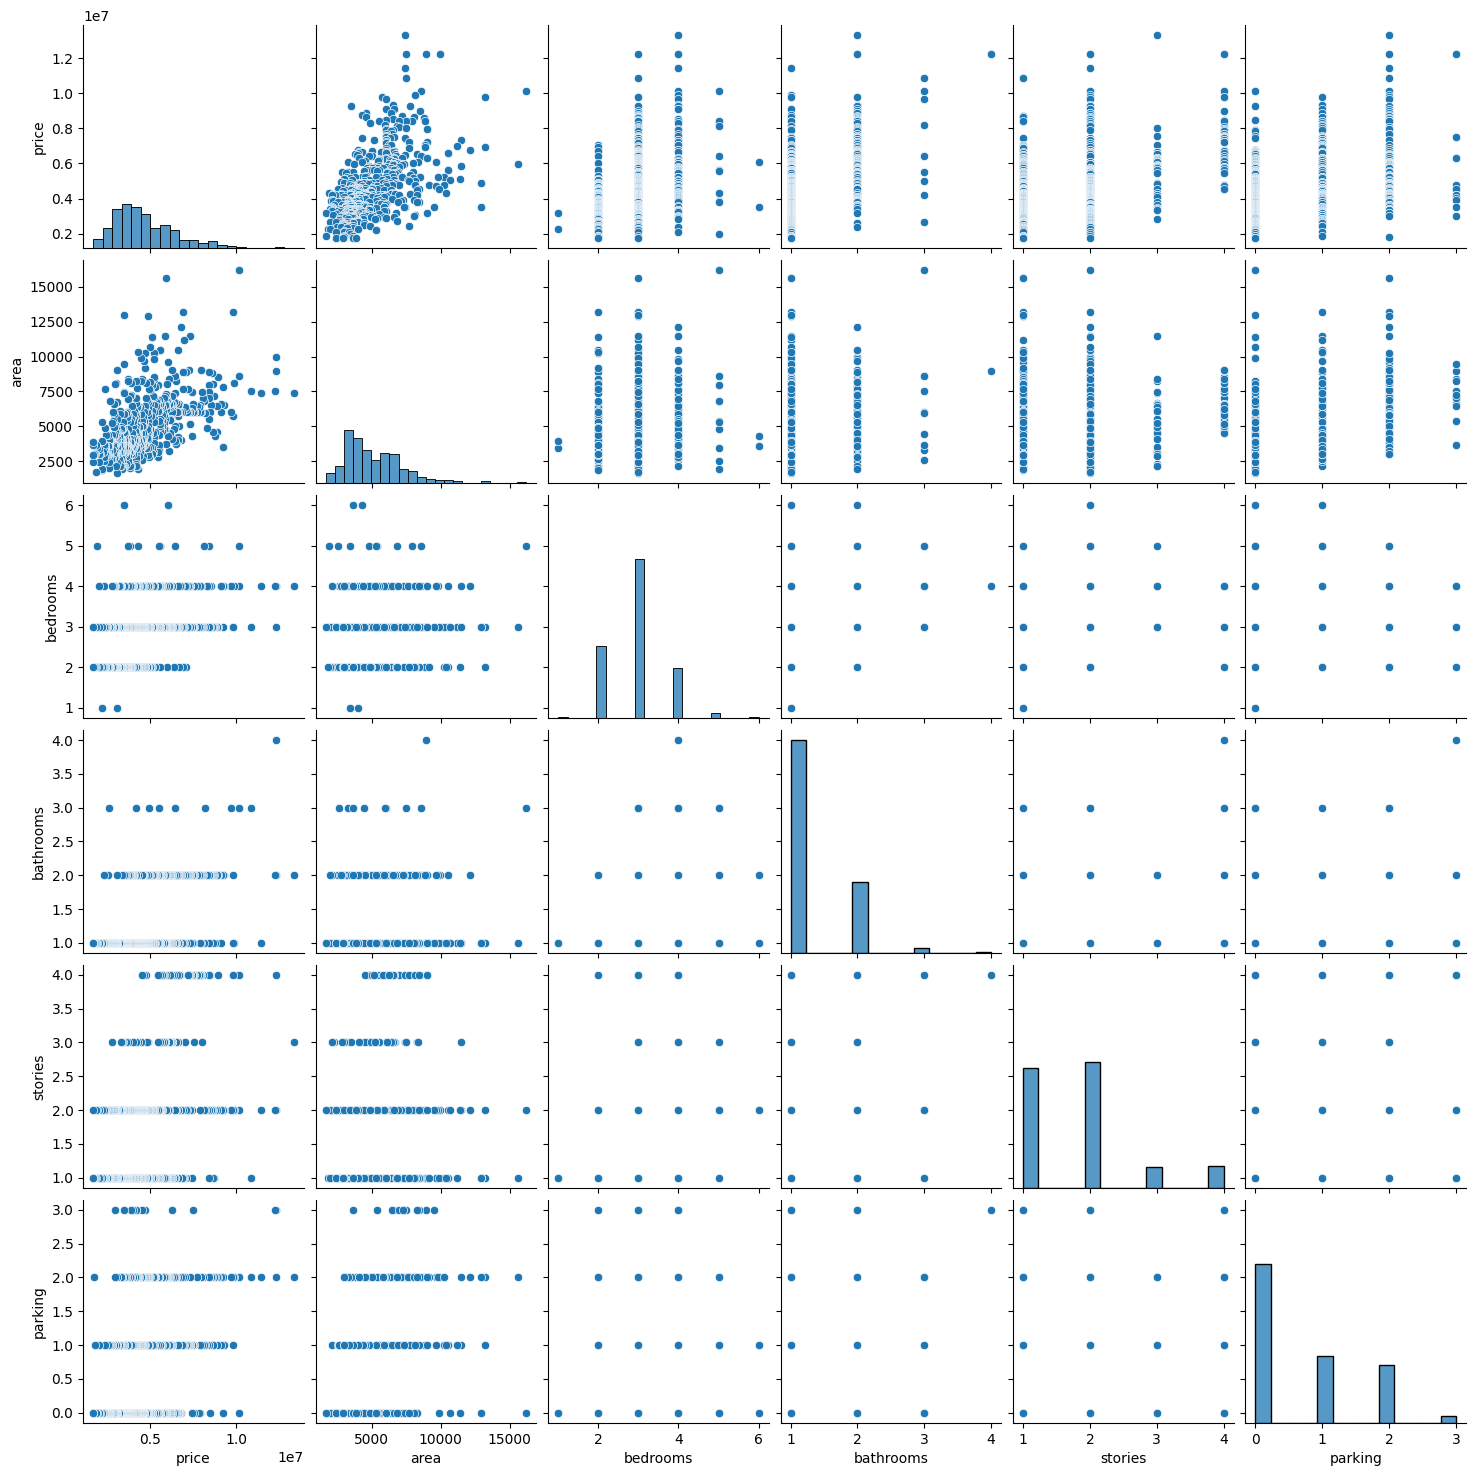

In [61]:
# A pairplot for all my numerical variables
sns.pairplot(df)
plt.show()

In [62]:
class  Visualize():
  def __init__(self,df):
    self.df = df
  def histplot(self,x,hue=None):
    fig = plt.figure(figsize=(20,8))
    sns.histplot(x=x,hue=hue,data=df)
    plt.xlabel(x)
    plt.ylabel("Total Frequency")
    plt.title(f"Histogram Distribution of {x}")
    plt.show()
  def boxplot(self,x,y,hue=None):
    fig = plt.figure(figsize=(20,8))
    sns.boxplot(x=x,y=y,hue=hue,data=df)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"A Boxplot showing the distribution of {x} ")
    plt.show()
  def barplot(self,x,y):
    fig = plt.figure(figsize=(20,8))
    sns.barplot(x=x,y=y,hue=None,data=df)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"A Barplot showing the distribution of {x} and {y}")
    plt.show()
  def jointplot(self,x,y,hue=None):
    fig = plt.figure(figsize=(20,8))
    sns.jointplot(x=x,y=y,hue=hue,data=df)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"A Jointplot showing the distribution of {x} and {y}")
    plt.show()
  def countplot(self,x,hue=None):
    fig = plt.figure(figsize=(20,8))
    sns.countplot(x=x,hue=hue,data=df)
    plt.xlabel(x)
    plt.ylabel("Total in Frequency ")
    plt.title(f"A Countplot  showing the distribution of {x}")
    plt.show()




In [63]:
visualize = Visualize(df=df)

In [64]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [65]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

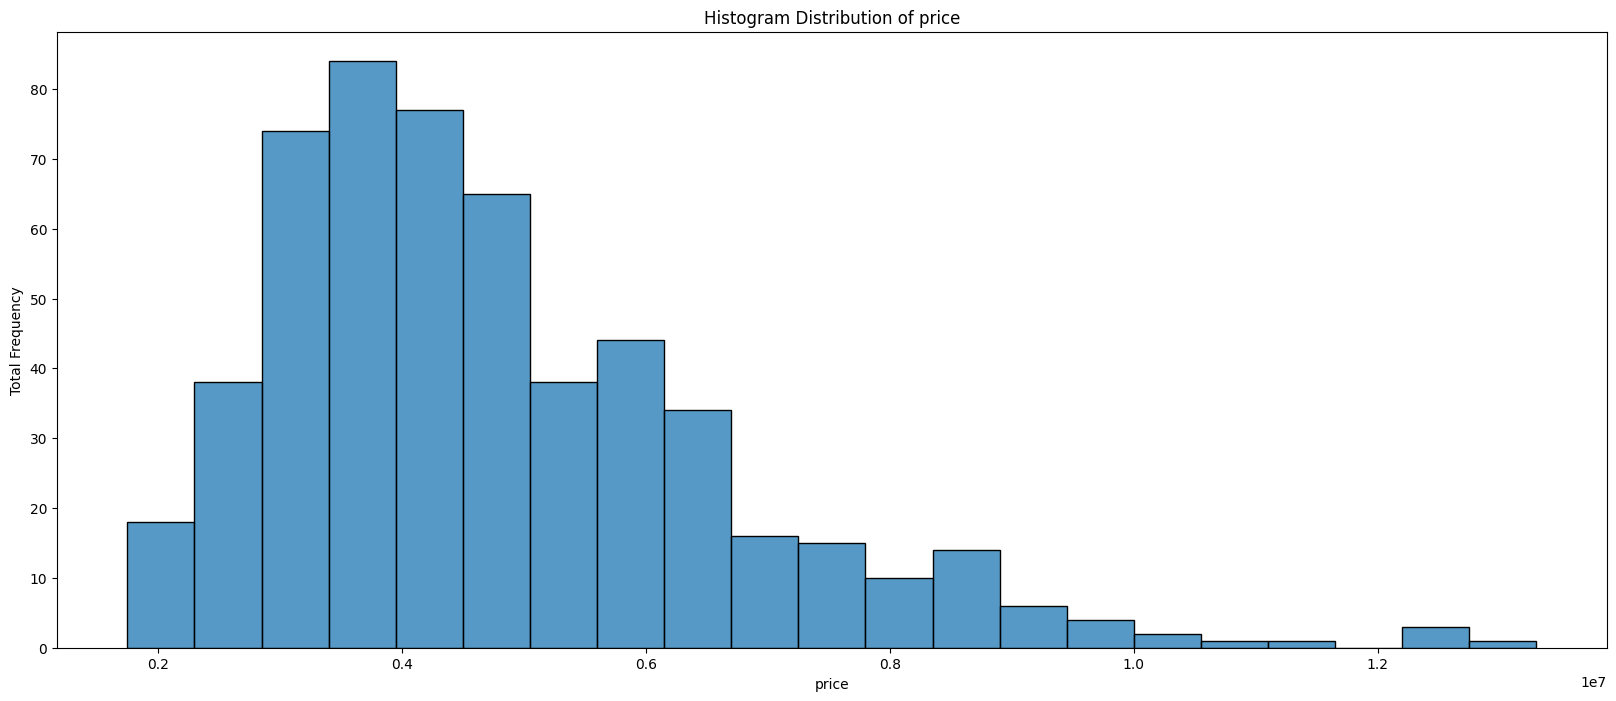

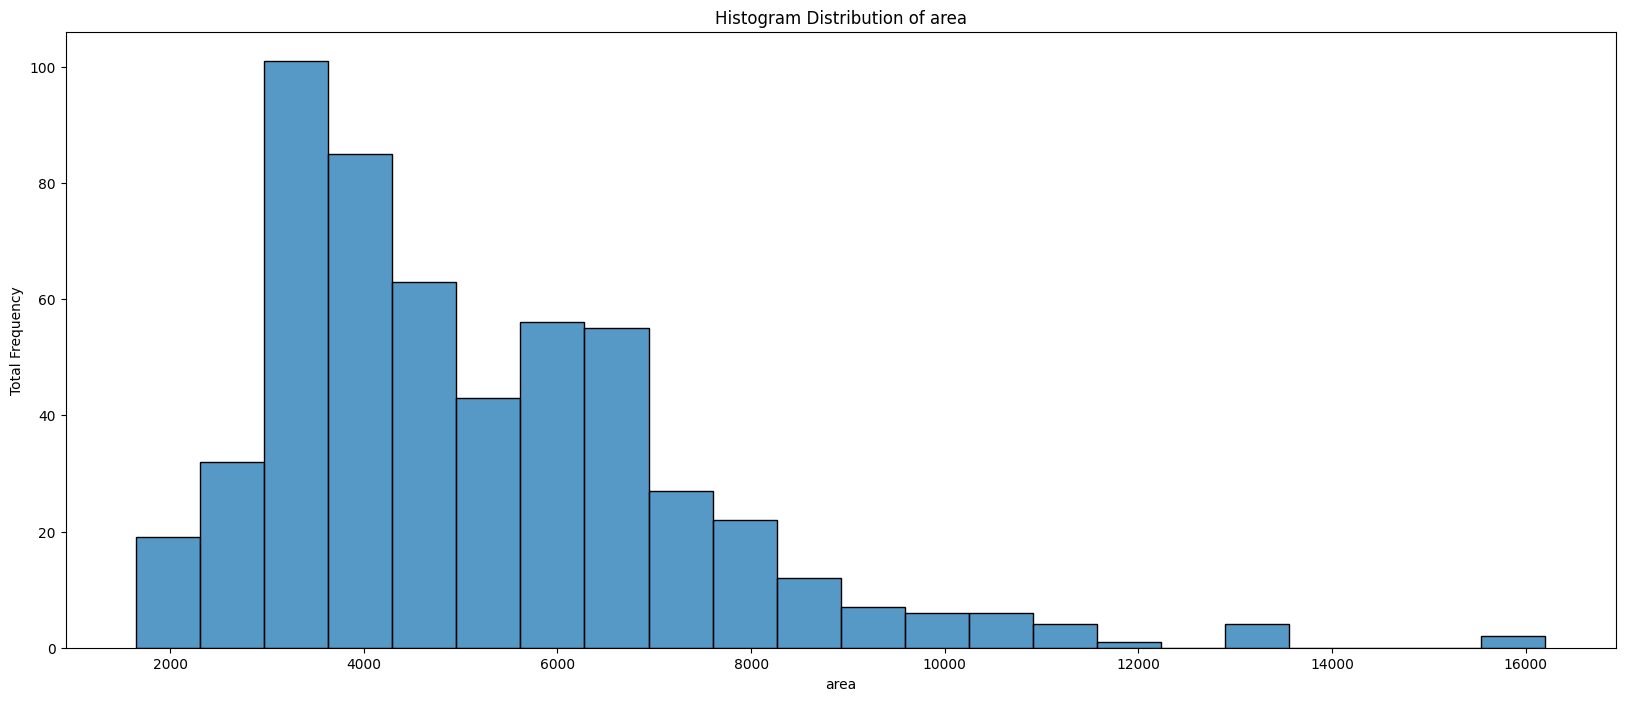

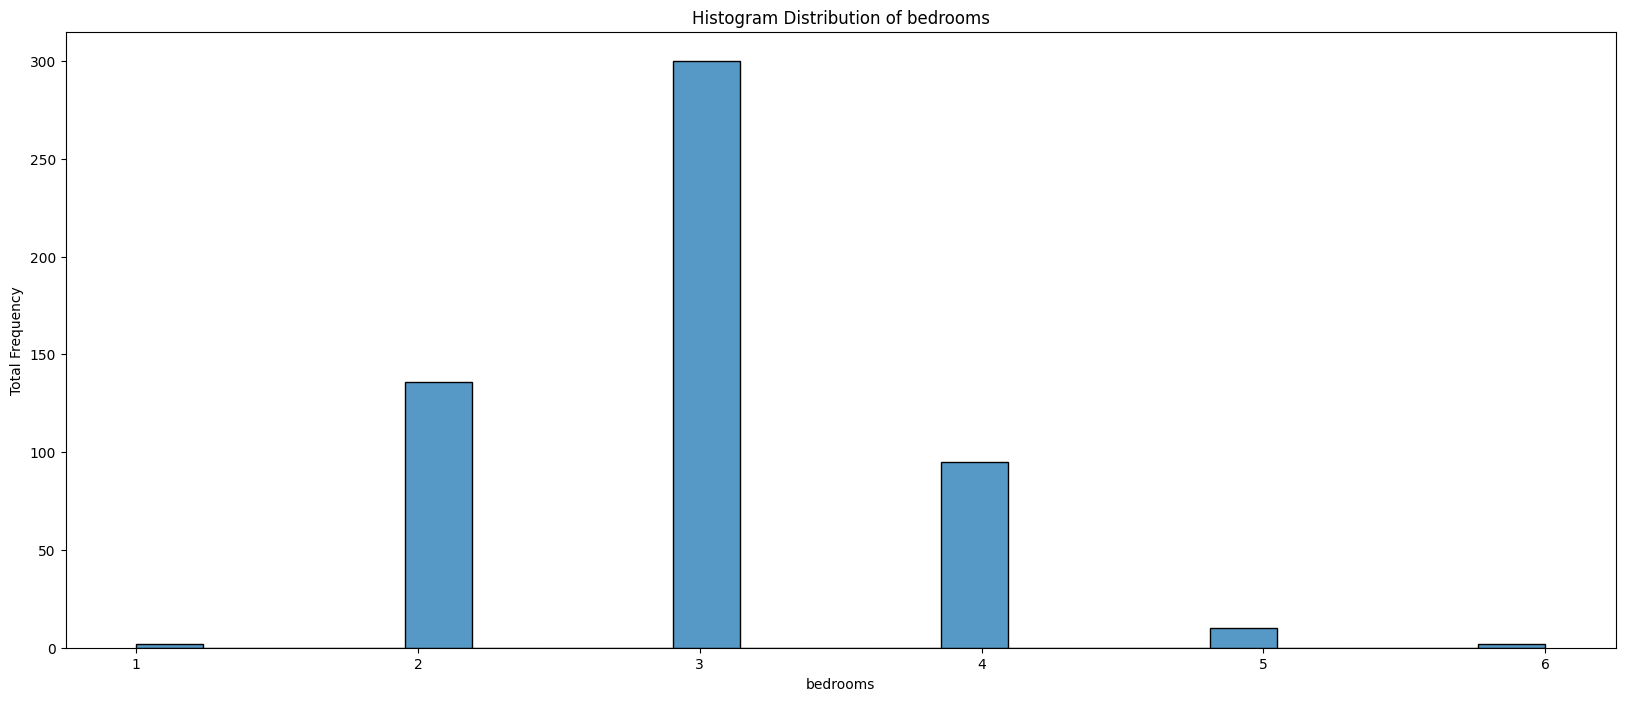

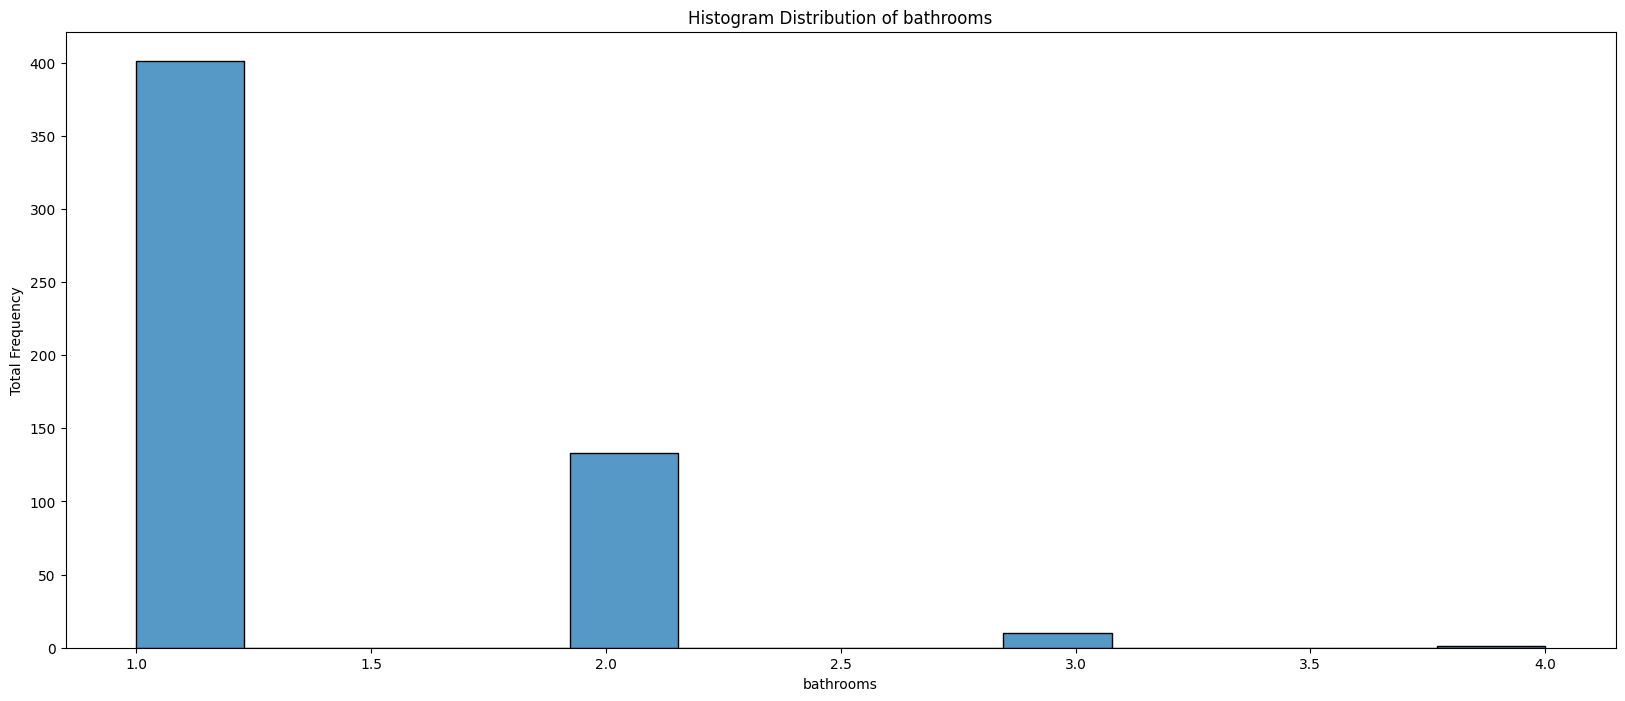

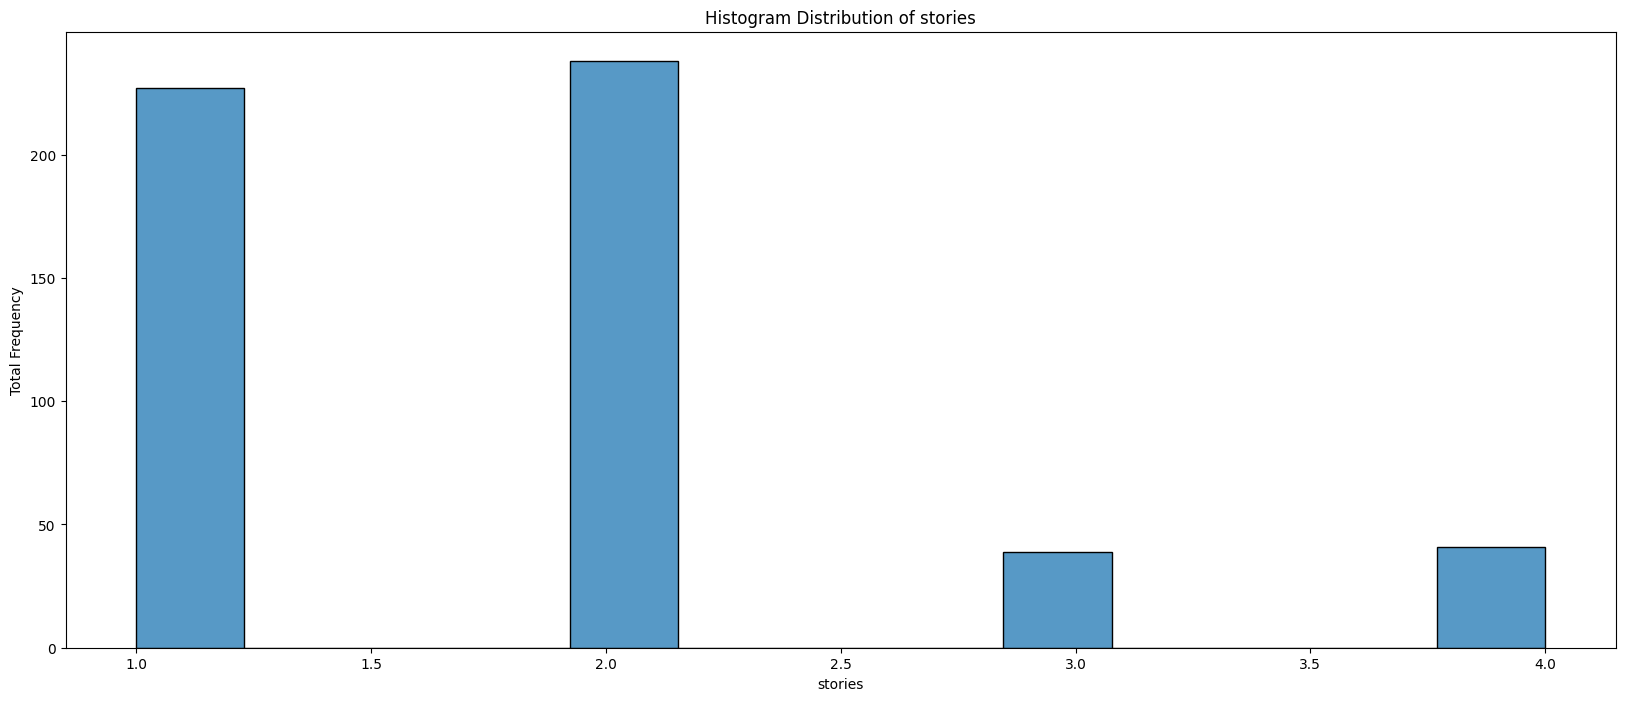

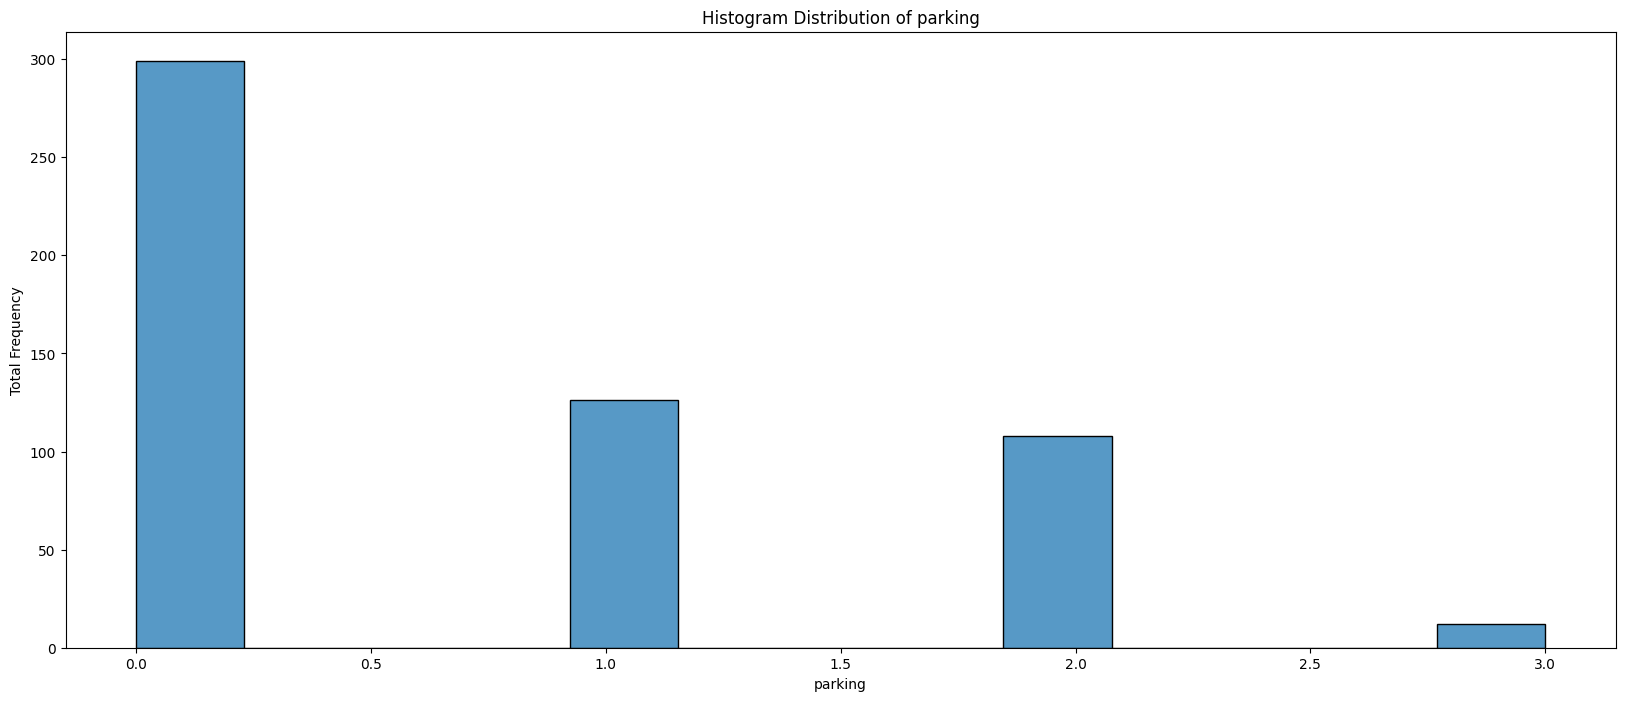

In [66]:
for column in df.columns :
  if column in ['price','area','bedrooms','bathrooms','stories','parking']:
    visualize.histplot(column)
  else :
    pass

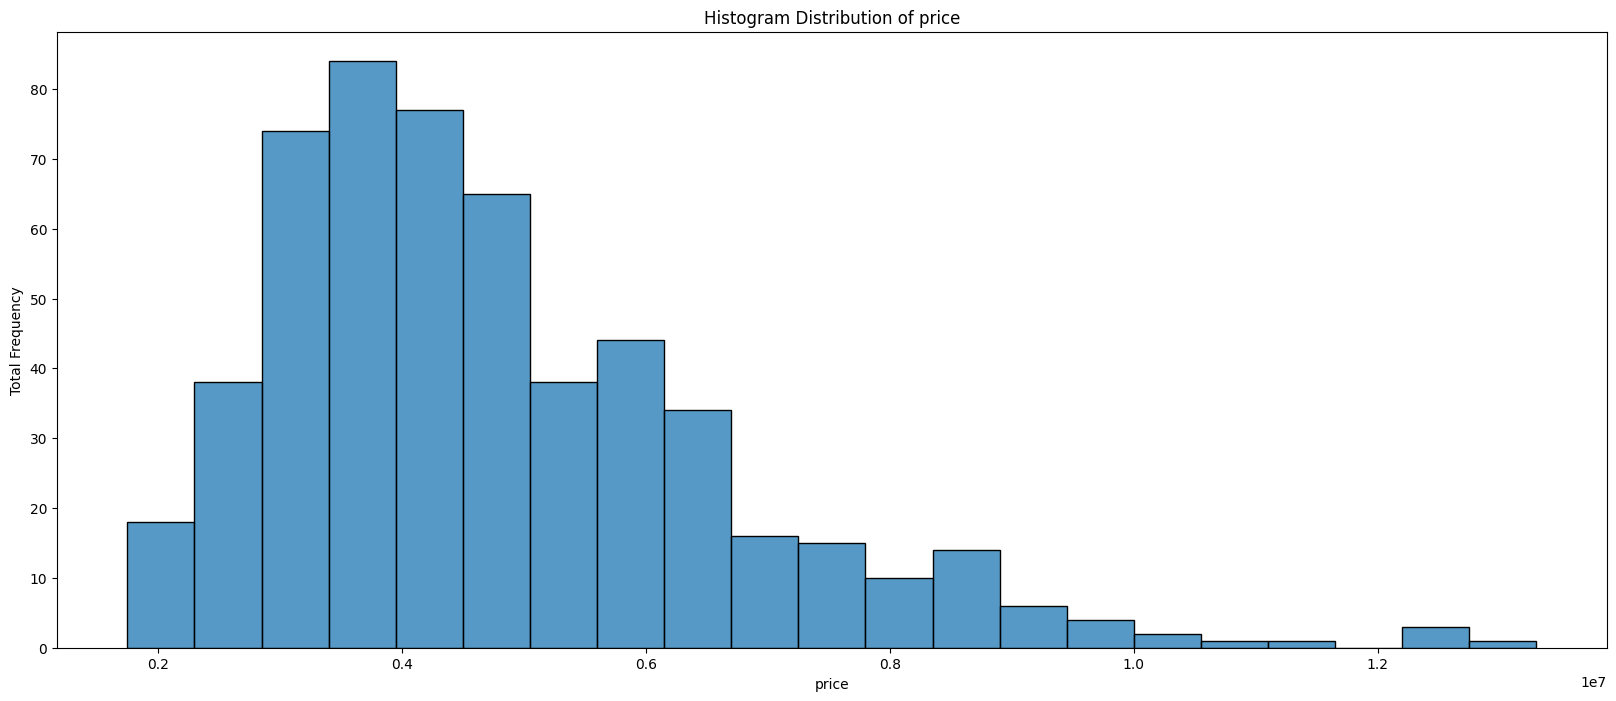

In [67]:
visualize.histplot('price') #  A majority of houses range at 0.375 units

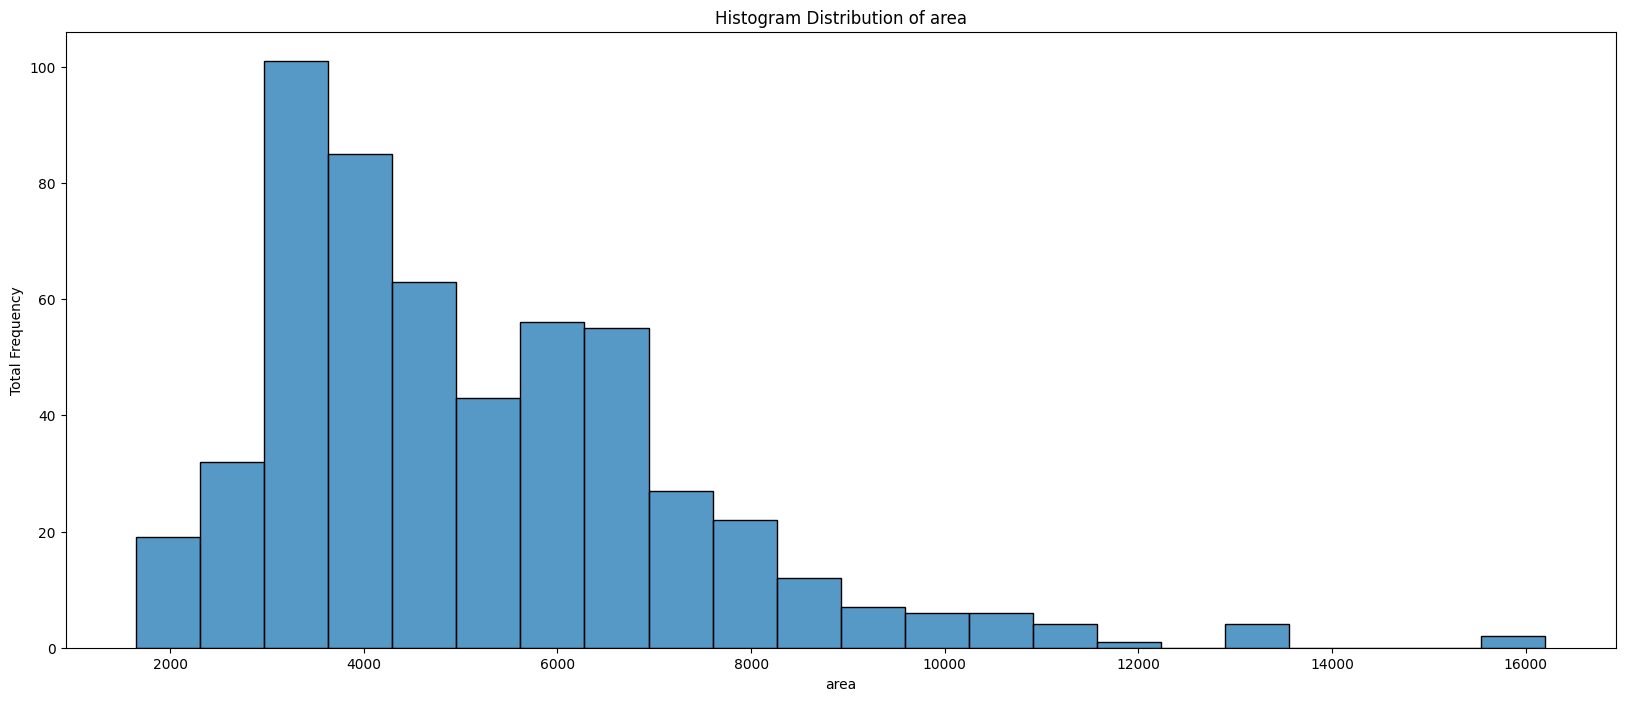

In [68]:
visualize.histplot('area') # A majority of the houses are 3000 sq ft

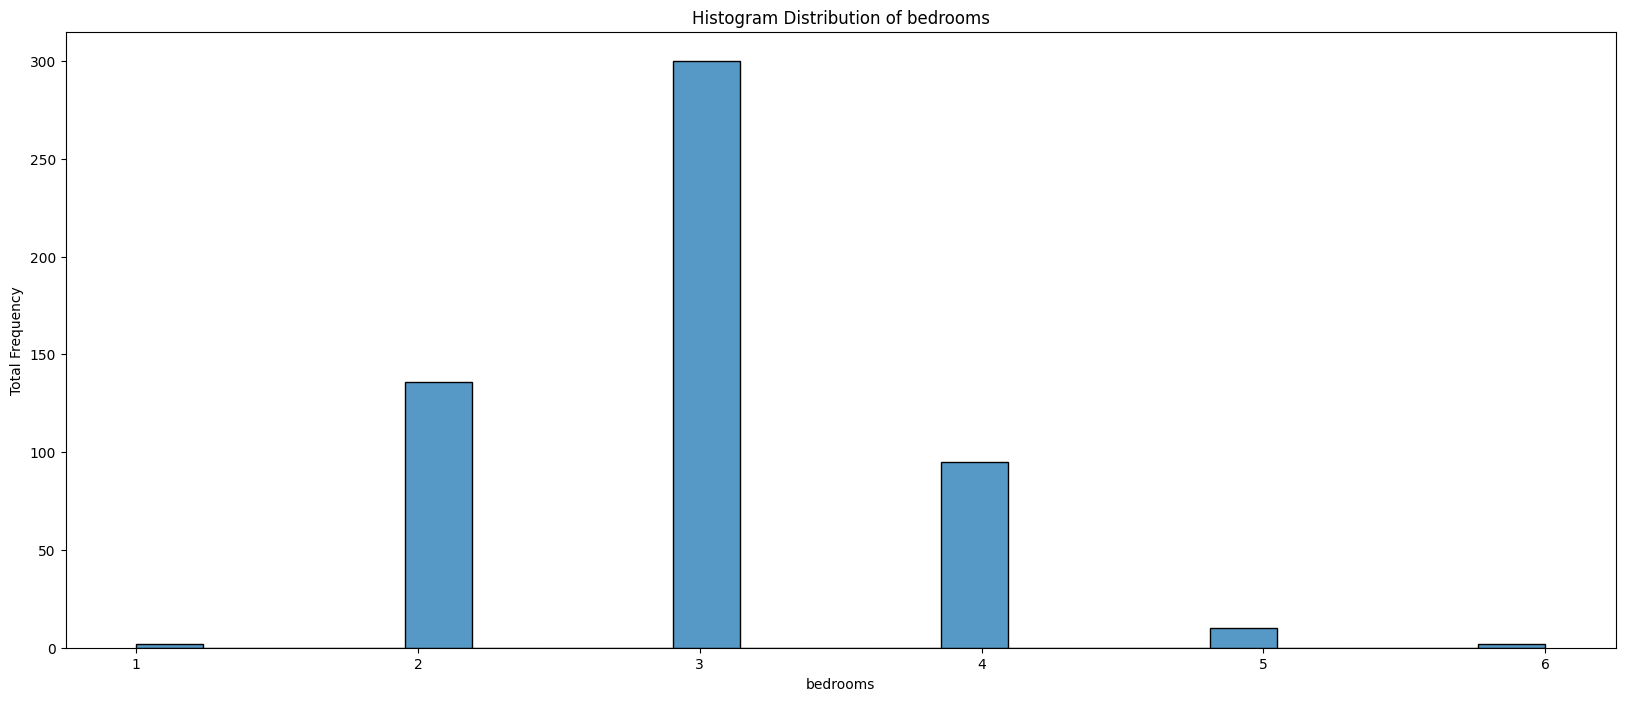

In [69]:
visualize.histplot('bedrooms') # A majority of the houses have 3 bedrooms

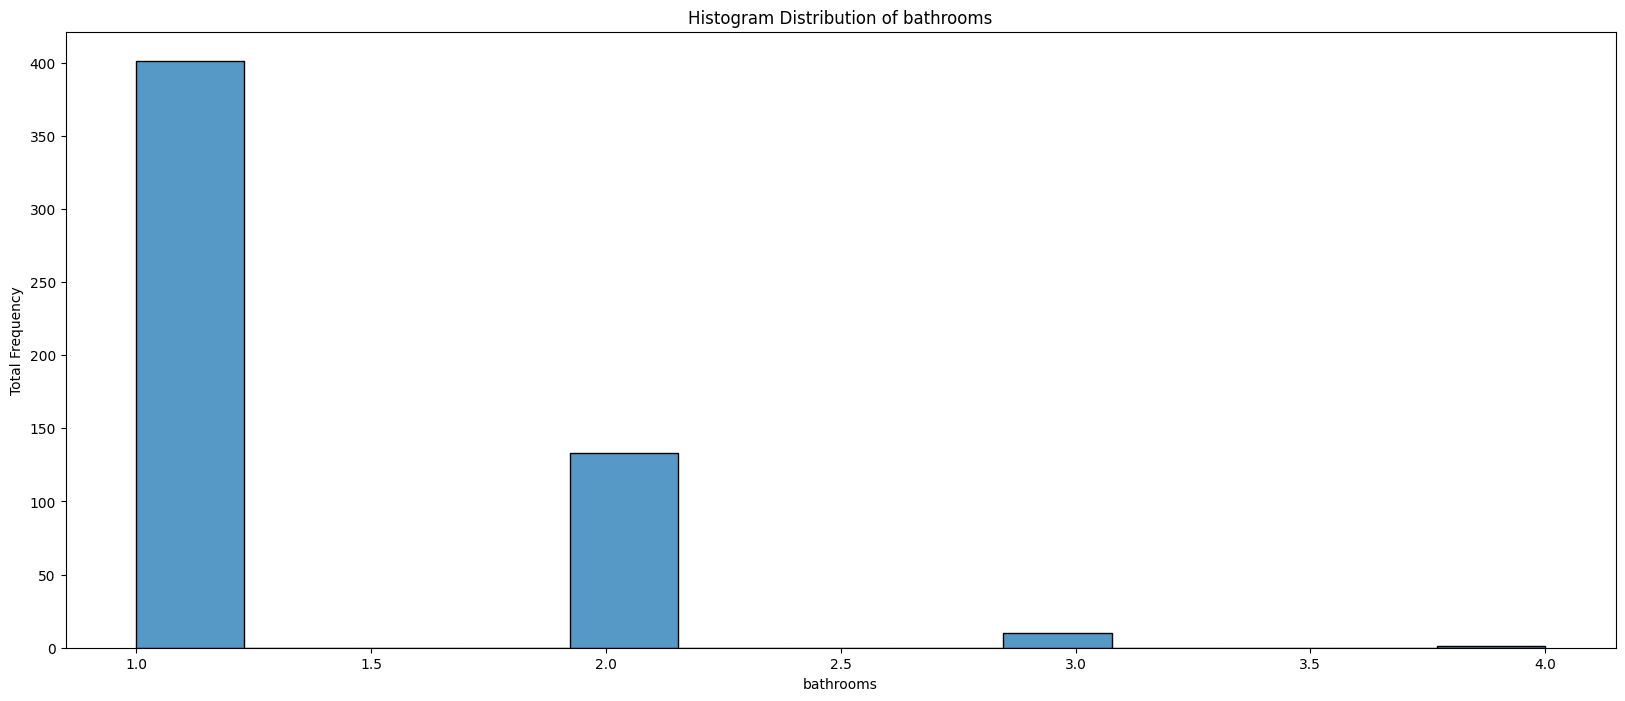

In [70]:
visualize.histplot('bathrooms') # A majority of the houses have 1 bathroom

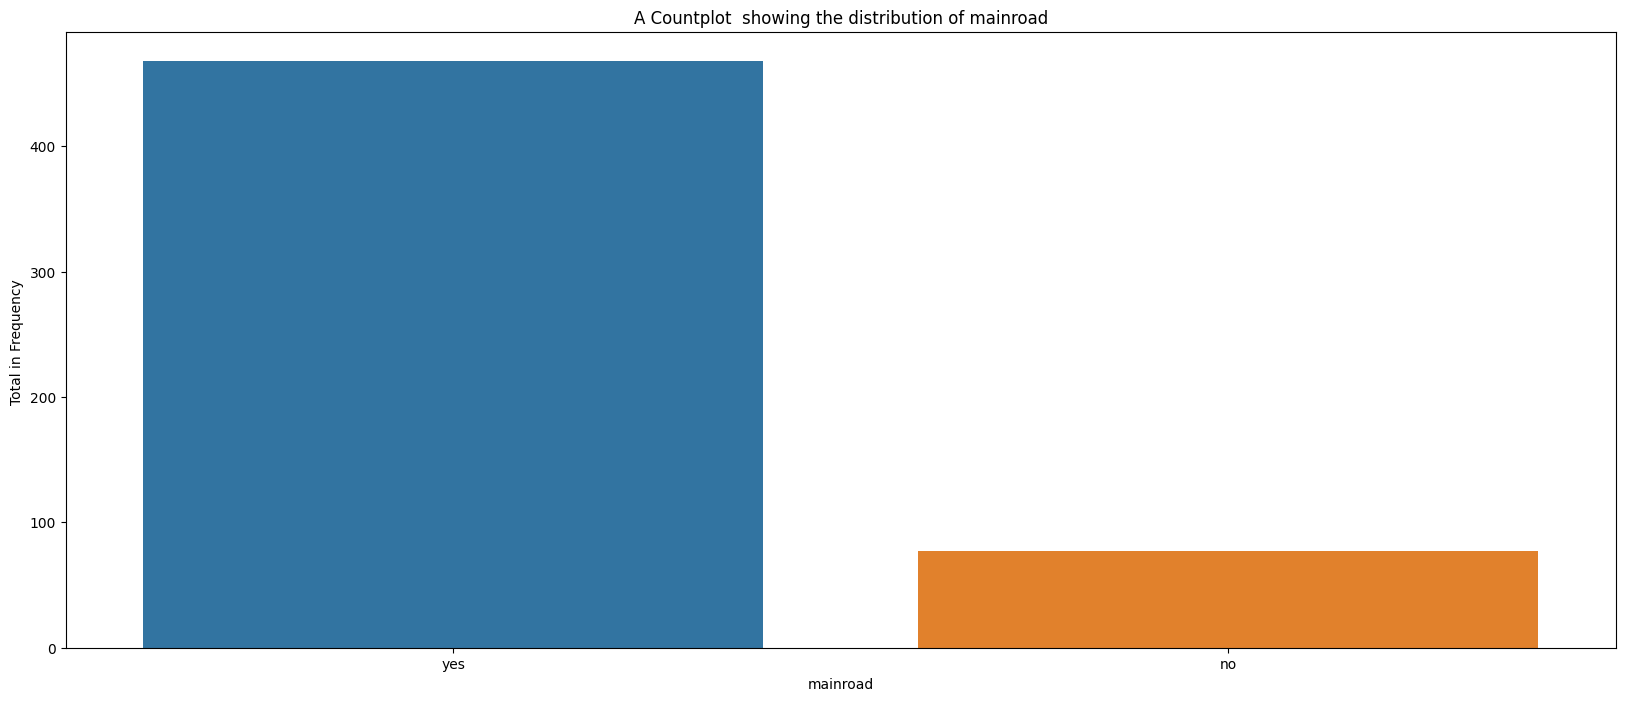

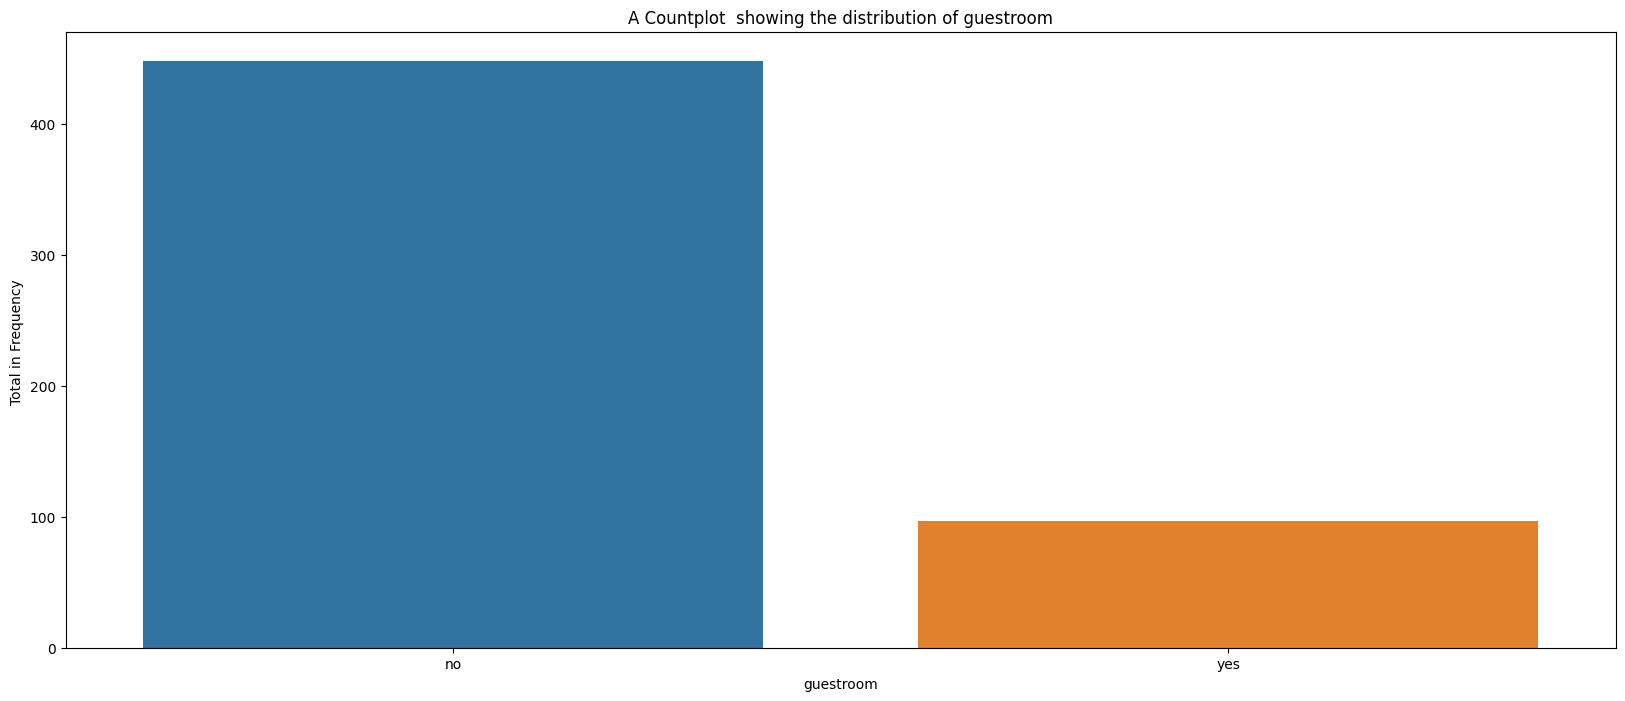

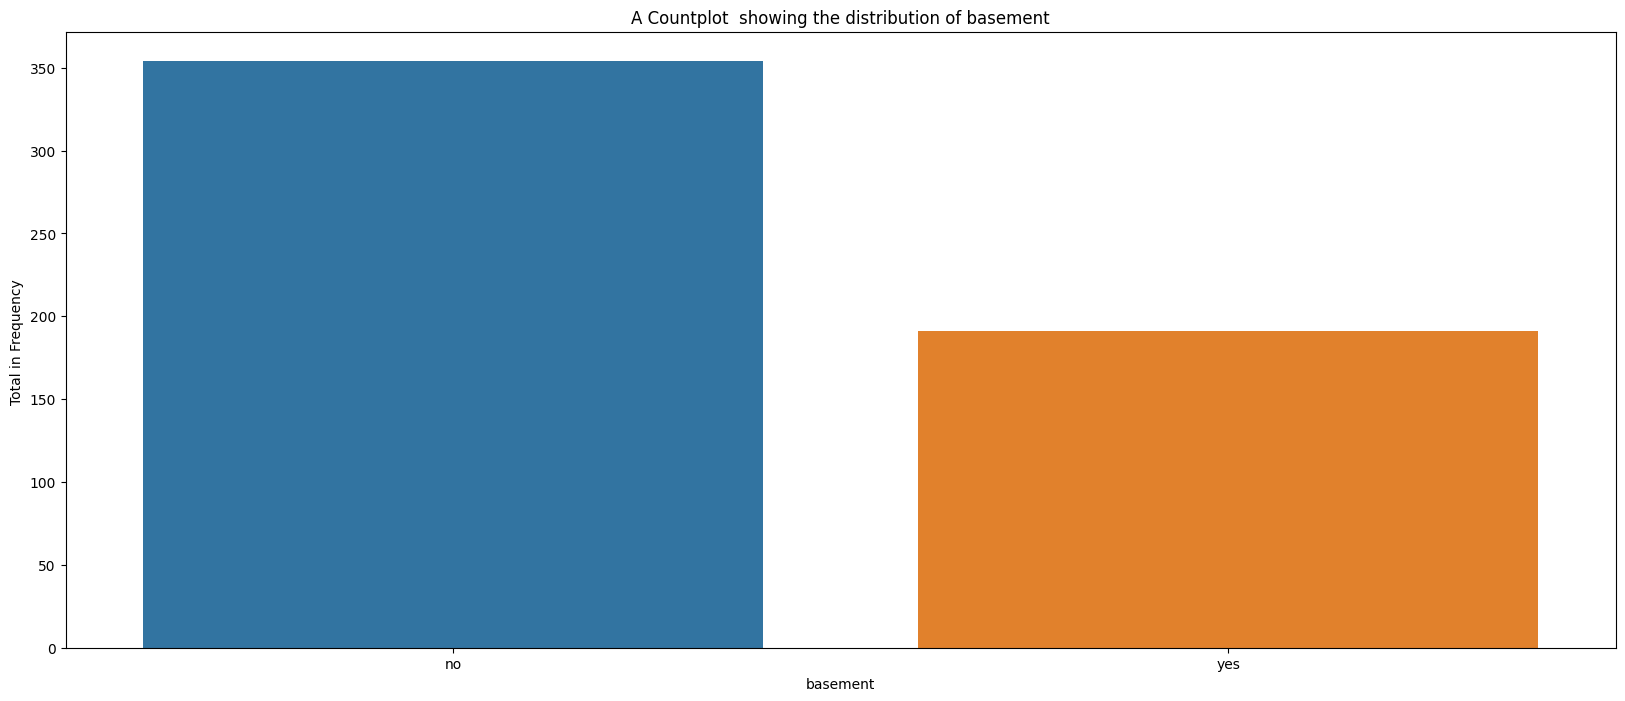

In [71]:
for column in df.columns :
  if column in ['mainroad','guestroom','basement']:
    visualize.countplot(column)
  else :
    pass

# A majority of our houses are close to the mainroad
# Most of the houses have no guestrooms
#  A lot of the houses have no basement

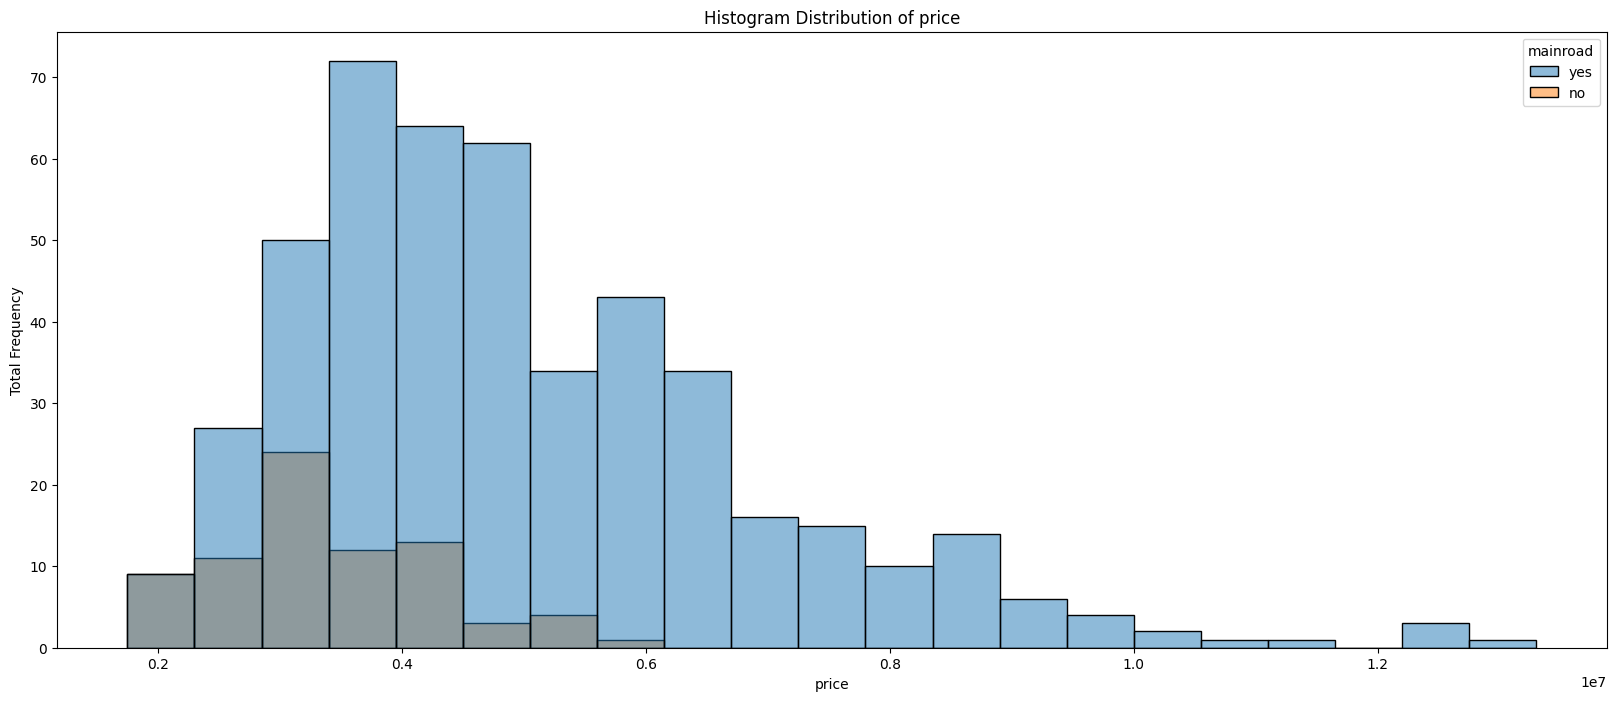

In [72]:
visualize.histplot(x='price',hue='mainroad') # The closer the house is to the mainroad the more expensive it is

# BOXPLOTS : CHECKING FOR OUTLIERS

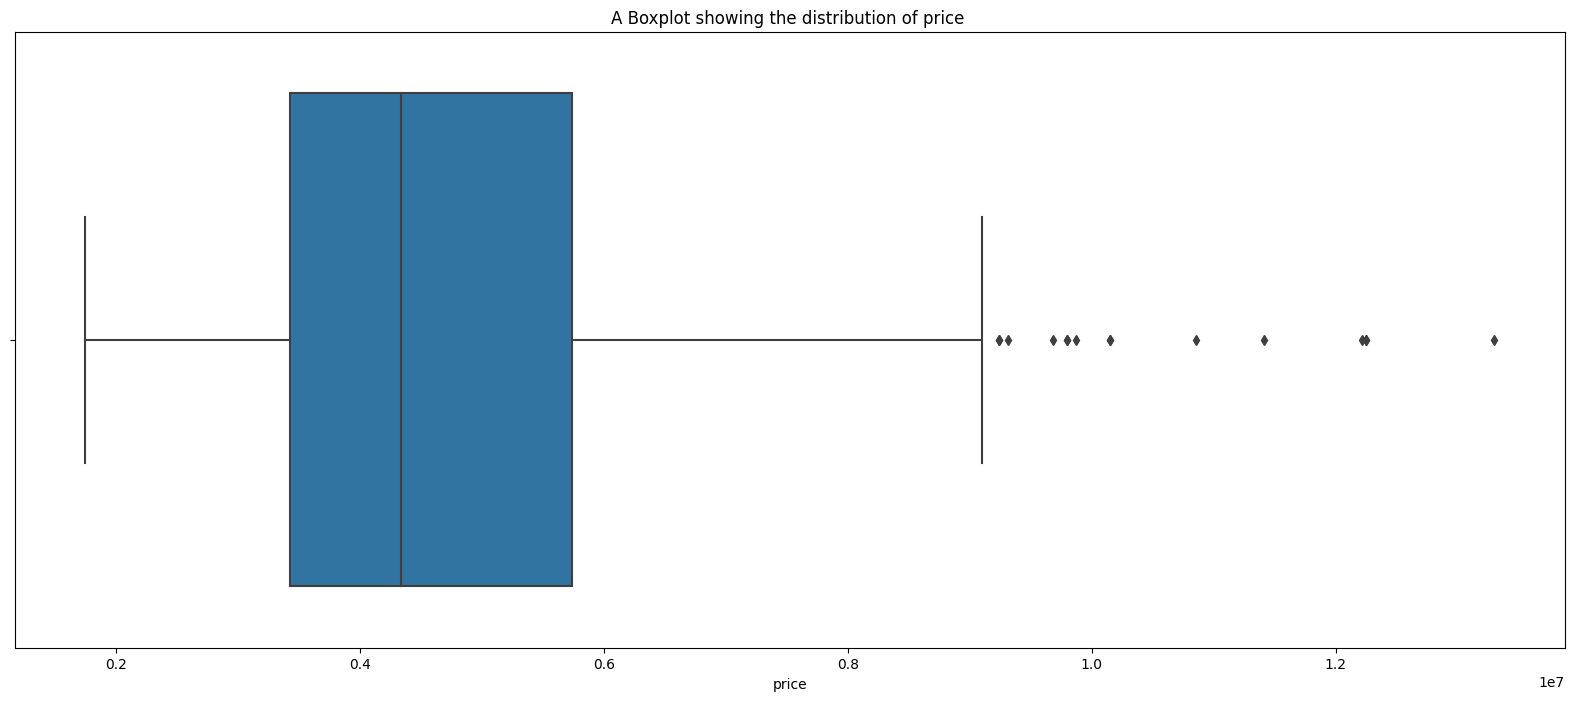

In [73]:
# Let me check on outliers in my data
visualize.boxplot(x='price',y=None)

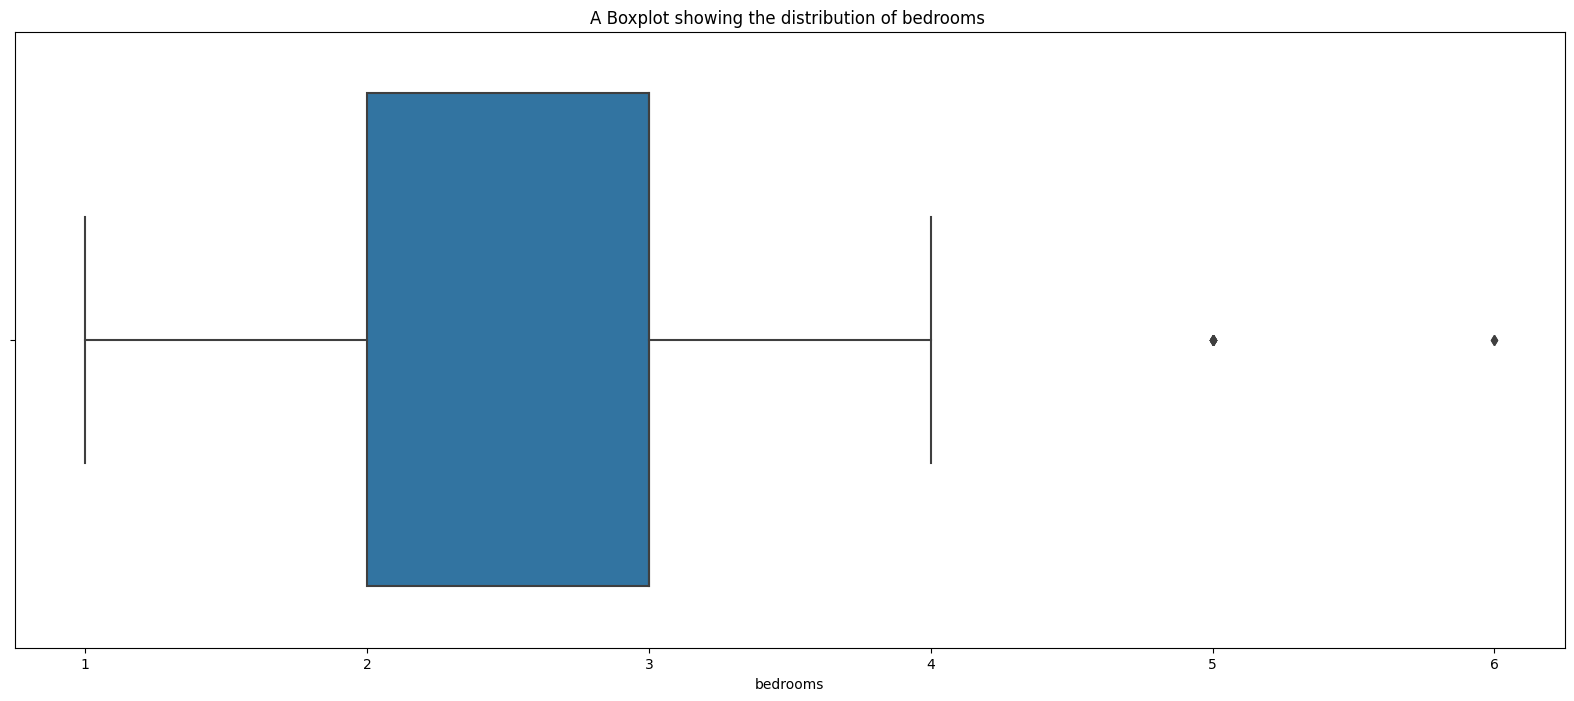

In [74]:
visualize.boxplot(x='bedrooms',y=None)

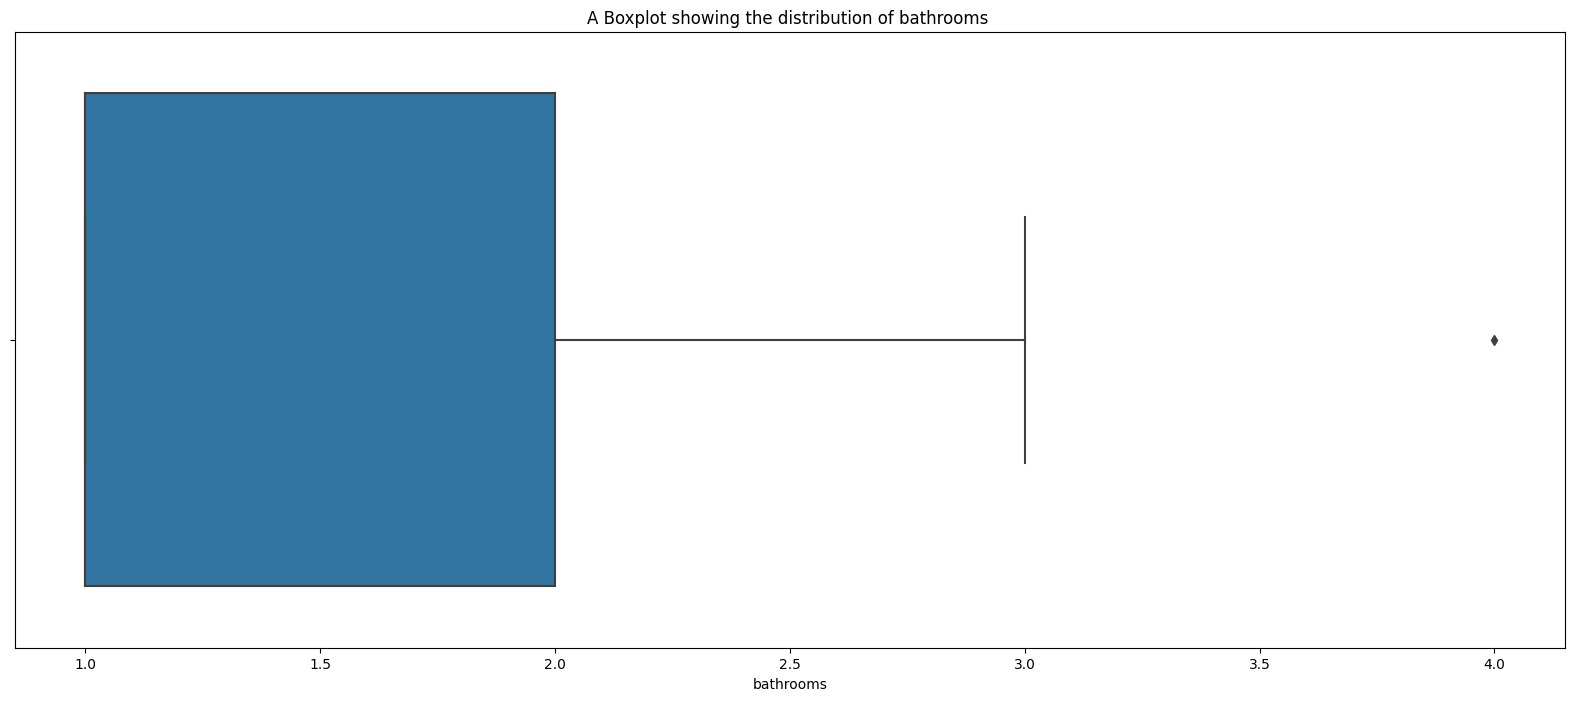

In [75]:
visualize.boxplot(x='bathrooms',y=None)

# JOINT DISTRIBUTIONS OF OUR TARGET AND LABEL VALUES

<Figure size 2000x800 with 0 Axes>

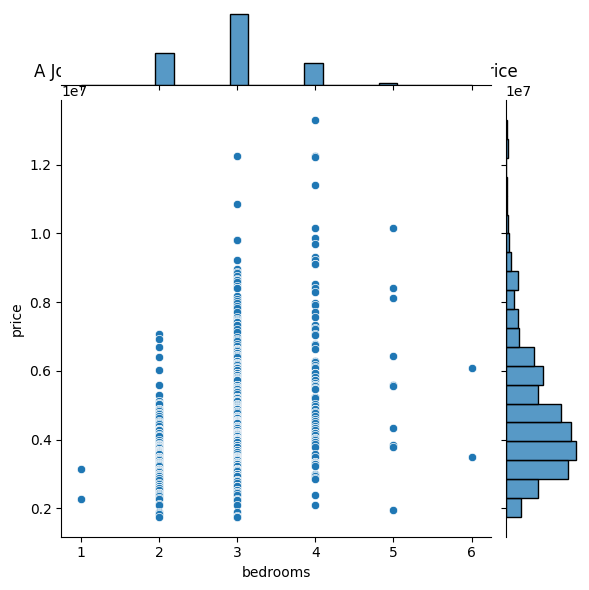

In [76]:
visualize.jointplot(x='bedrooms',y='price')

<Figure size 2000x800 with 0 Axes>

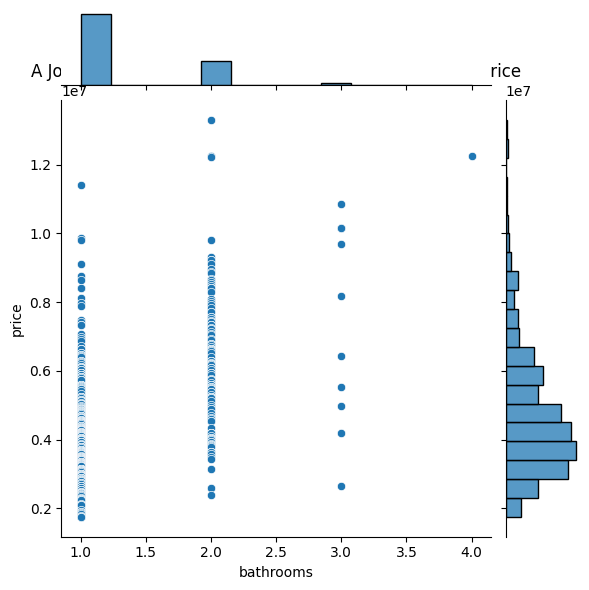

In [77]:
visualize.jointplot(x='bathrooms',y='price')

<Figure size 2000x800 with 0 Axes>

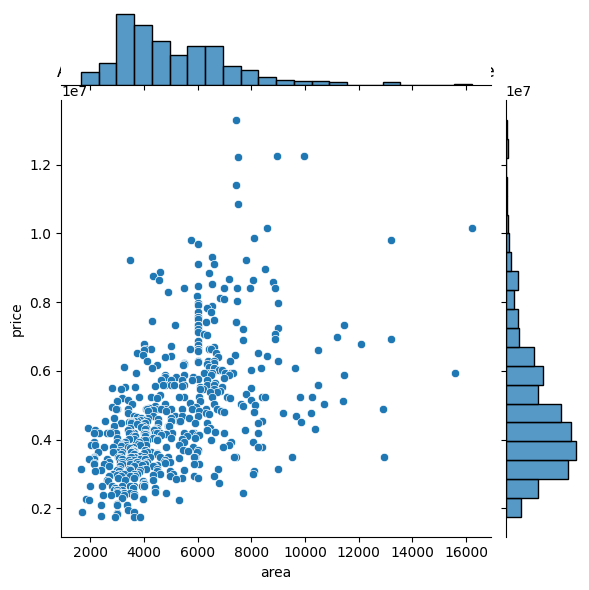

In [78]:
visualize.jointplot(x='area',y='price')

LM PLOTS TO CHECK IF THERE IS A LINE OF BEST FIT

In [79]:
def line_of_best(column,dependent='price', df= df):
  fig = plt.figure(figsize=(20,8))
  sns.lmplot(x=column,y=dependent,data=df)
  plt.xlabel(column)
  plt.ylabel("Dependent Variable")
  plt.title(f"A plot to check for linear relationship between{column} and {dependent}")
  plt.show()


<Figure size 2000x800 with 0 Axes>

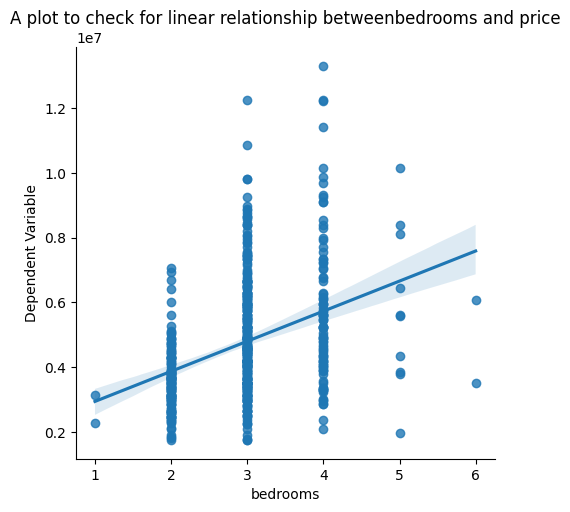

In [80]:
line_of_best('bedrooms')

<Figure size 2000x800 with 0 Axes>

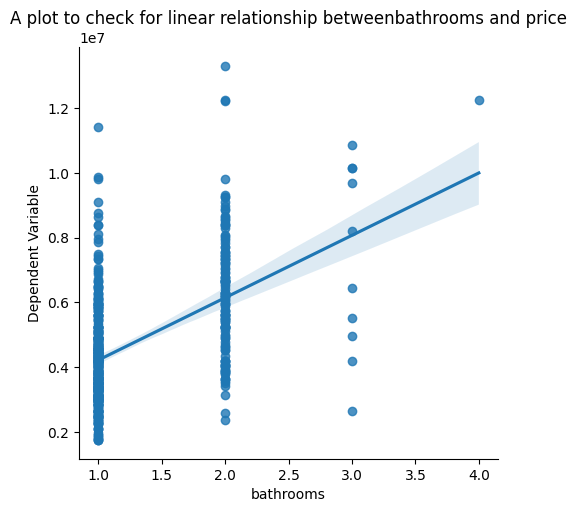

In [81]:
line_of_best('bathrooms')

<Figure size 2000x800 with 0 Axes>

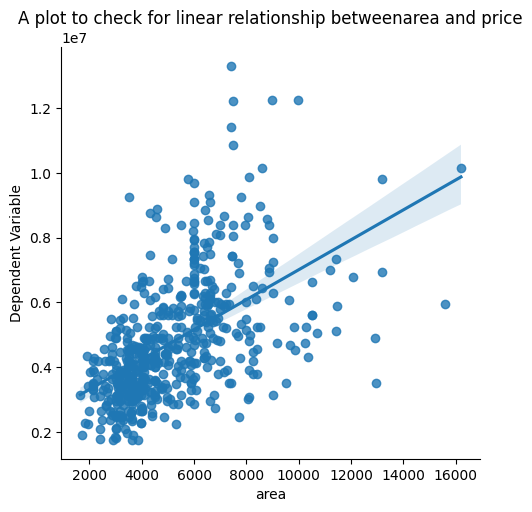

In [82]:
line_of_best('area')

In [83]:
# Checking for correlation
df[['price','bedrooms','bathrooms','area']].corr()

,price,bedrooms,bathrooms,area
price,1.000000,0.366494,0.517545,0.535997
bedrooms,0.366494,1.000000,0.373930,0.151858
bathrooms,0.517545,0.373930,1.000000,0.193820
area,0.535997,0.151858,0.193820,1.000000


In [84]:
correlation = df[['price','bedrooms','bathrooms','area']].corr() # There is a linear relationship and so we can proceed with Linear Regression

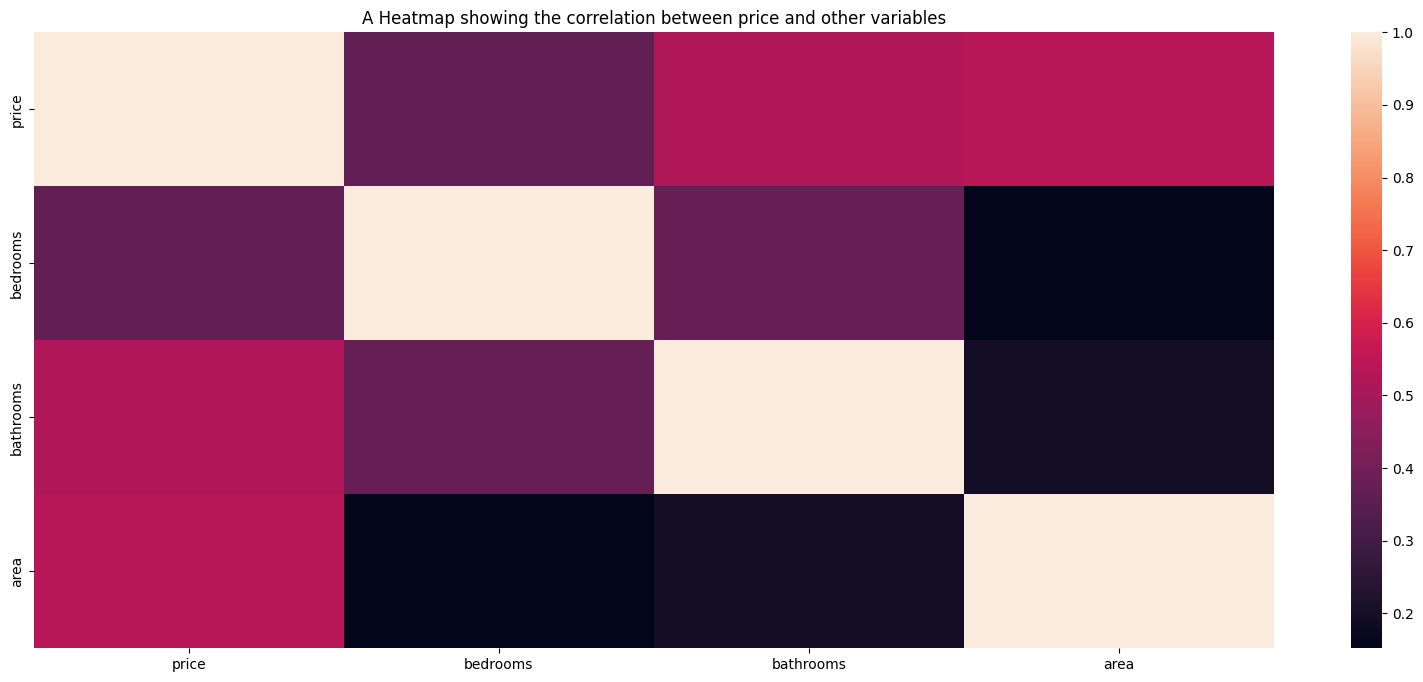

In [85]:
plt.figure(figsize=(20,8))
sns.heatmap(correlation)
plt.title("A Heatmap showing the correlation between price and other variables")
plt.show()

# FEATURE SELECTION AND SCALING

In [86]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [93]:
X = df.drop(['prefarea','furnishingstatus','basement', 'hotwaterheating', 'airconditioning','stories', 'mainroad','price'
,'guestroom', 'parking'],axis=1)
X =MinMaxScaler().fit_transform(X)
y = df['price']

X

array([[0.39656357, 0.6       , 0.33333333],
       [0.5024055 , 0.6       , 1.        ],
       [0.57113402, 0.4       , 0.33333333],
       ...,
       [0.13539519, 0.2       , 0.        ],
       [0.08659794, 0.4       , 0.        ],
       [0.15120275, 0.4       , 0.        ]])

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5122023)

In [95]:
X_train.shape

(381, 3)

# MACHINE LEARNING : LINEAR REGRESSION

In [89]:
lr = LinearRegression()

In [90]:
lr.fit(X_train,y_train)
my_predictions = lr.predict(X_test)
from sklearn.metrics import mean_squared_error,mean_squared_log_error,mean_absolute_error


EVALUATION AND PREDICTION

In [91]:
print(f"The mean squared error for Linear Regression stands  for at {mean_squared_error(y_test,my_predictions)}")
print(f"The mean squared log error for Linear Regression stands at {mean_squared_log_error(y_test,my_predictions)}")
print(f"The mean absolute error for Linear Regression stands at {mean_absolute_error(y_test,my_predictions)}")
print(f"The root mean squared error for Linear Regression  stands at {np.sqrt(mean_squared_error(y_test,my_predictions))}")

The mean squared error stands at 1776488544711.11
The mean squared log error stands at 0.0793711640999055
The mean absolute error stands at 1031923.2456428959
The root mean squared error stands at 1332849.783250577


# RIDGE REGRESSION

In [96]:
# Lets use RidgeRegression
from sklearn.linear_model import Ridge
rd = Ridge()
rd.fit(X_train,y_train)
ridge_predictions = rd.predict(X_test)

In [100]:
print(f"The mean squared error  for Ridge Regression stands at {mean_squared_error(y_test,ridge_predictions)}")
print(f"The mean squared log error for Ridge Regression stands at {mean_squared_log_error(y_test,ridge_predictions)}")
print(f"The mean absolute error for Ridge Regressionstands at {mean_absolute_error(y_test,ridge_predictions)}")
print(f"The root mean squared error for Ridge Regression stands at {np.sqrt(mean_squared_error(y_test,ridge_predictions))}")

The mean squared error  for Ridge Regression stands at 1781797494359.1108
The mean squared log error for Ridge Regression stands at 0.08140941470848281
The mean absolute error for Ridge Regressionstands at 1037310.6638616337
The root mean squared error for Ridge Regression stands at 1334839.8759248657


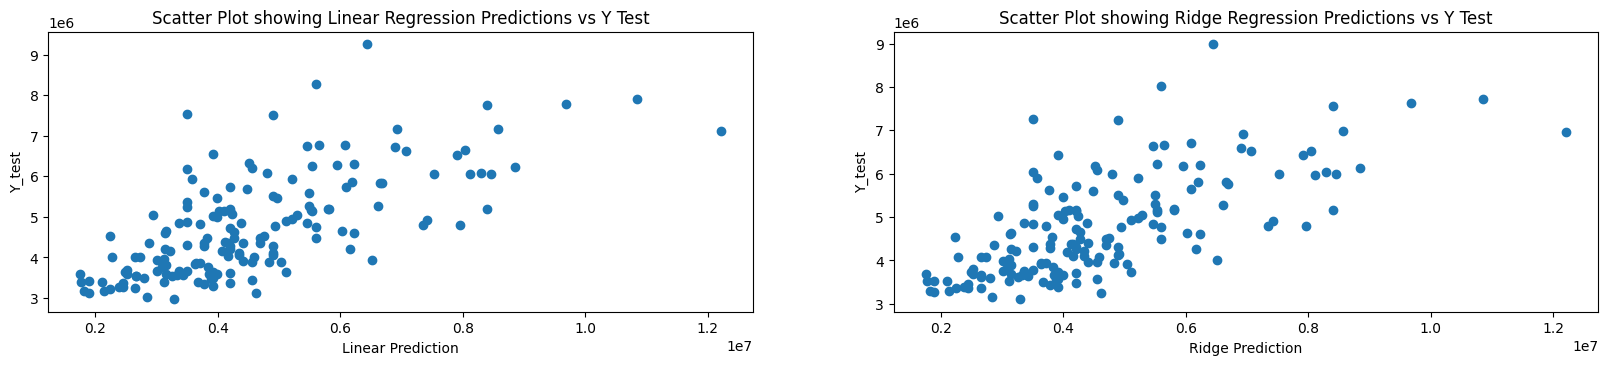

In [102]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
plt.scatter(y_test,my_predictions)
plt.xlabel("Linear Prediction")
plt.ylabel("Y_test")
plt.title("Scatter Plot showing Linear Regression Predictions vs Y Test")
plt.subplot(2,2,2)
plt.scatter(y_test,ridge_predictions)
plt.xlabel("Ridge Prediction")
plt.ylabel("Y_test")
plt.title("Scatter Plot showing Ridge Regression Predictions vs Y Test")
plt.show()

**CONCLUSION**

The task was to fit a linear model with 3 variables : Area ,Number of Bedrooms and Number of Bathrooms .
 Doing data anlaysis  I found that there was indeed a relationship between the said variables and the price which I was to predict .
 I did this using correlation and statistical plots . Given the data I then modelled this using machine learning, experimented with
 A Linear Model and  Ridge regression and the results were  remarkable .



 Here's the link to my data source  : https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction